In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.abc import s, t
from sympy import exp

3.1

In [3]:
#Definindo as funções no domínio de s 

Y_1 = (1/2)/(s*(s+5)*(s+(1/2))*(s+2))
Y_2 = (1/2)/((s+5)*(s+(1/2))*(s+2))

In [4]:
#Aplicando a transformada inversa de laplace para encontrar as expressões no domínio do tempo 

transformada_inversa_laplace_Y1 = sym.inverse_laplace_transform(Y_1, s, t)
transformada_inversa_laplace_Y2 = sym.inverse_laplace_transform(Y_2, s, t)

In [5]:
print(transformada_inversa_laplace_Y1)
print(transformada_inversa_laplace_Y2)

0.1*Heaviside(t) - 0.00740740740740741*exp(-5.0*t)*Heaviside(t) + 0.0555555555555556*exp(-2.0*t)*Heaviside(t) - 0.148148148148148*exp(-0.5*t)*Heaviside(t)
0.037037037037037*exp(-5.0*t)*Heaviside(t) - 0.111111111111111*exp(-2.0*t)*Heaviside(t) + 0.0740740740740741*exp(-0.5*t)*Heaviside(t)


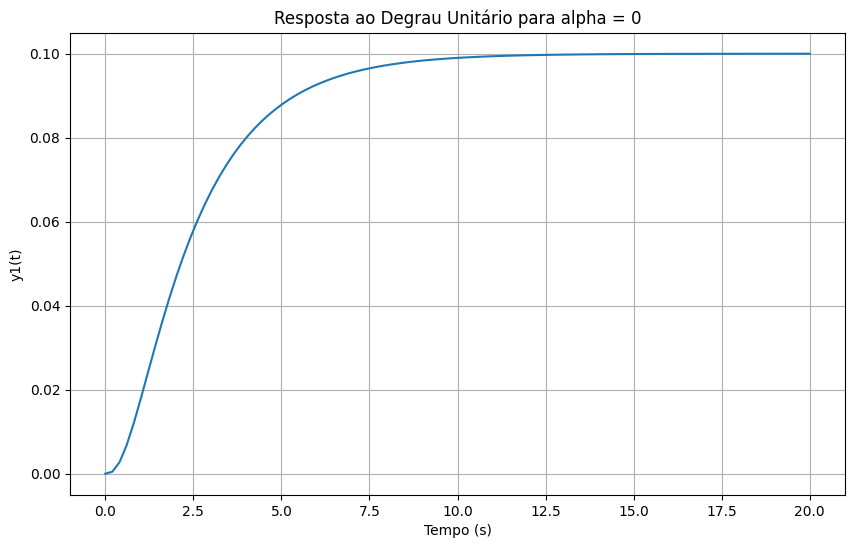

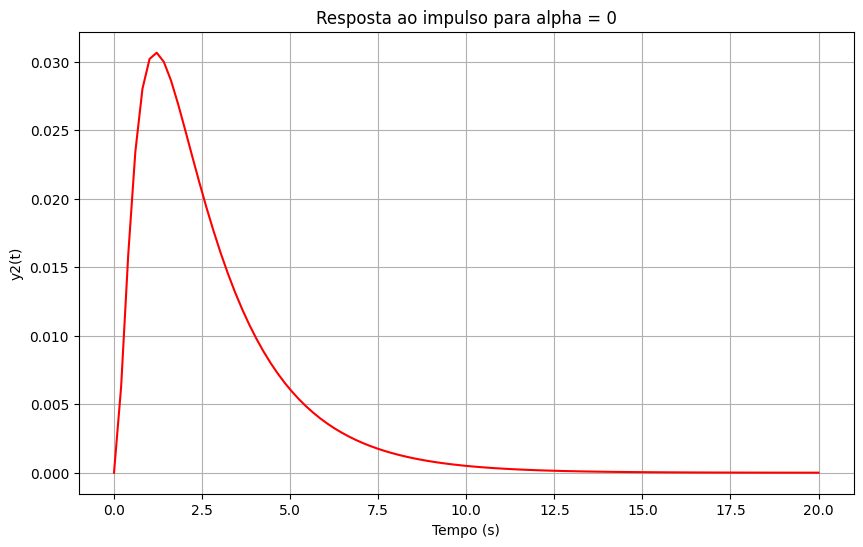

In [6]:
#Plotando os gráficos das respostas ao degrau unitario e ao impulso

x = np.linspace(0, 20, 100)


#Lamdify converte a expressão simbólica para uma função numpy
resposta_degrau = sym.lambdify(t, transformada_inversa_laplace_Y1, modules=['numpy'])
resposta_impulso = sym.lambdify(t,transformada_inversa_laplace_Y2, modules=['numpy'])


y1 = resposta_degrau(x)
y2 = resposta_impulso(x)

plt.figure(figsize=(10,6))
plt.plot(x, y1, label='f(x)')
plt.title('Resposta ao Degrau Unitário para alpha = 0')
plt.xlabel('Tempo (s)')
plt.ylabel('y1(t)')
plt.grid(True)

plt.figure(figsize=(10,6))
plt.plot(x, y2, label='f(x)', color='r')
plt.title('Resposta ao impulso para alpha = 0')
plt.xlabel('Tempo (s)')
plt.ylabel('y2(t)')
plt.grid(True)

plt.show()

3.2

In [7]:
def G_s(alfa):
    return ((alfa*s +1)/2)/(s*(s+5)*(s+0.5)*(s+2))

transformada inversa de alpha = -5: 0.1*Heaviside(t) - 0.192592592592593*exp(-5.0*t)*Heaviside(t) + 0.611111111111111*exp(-2.0*t)*Heaviside(t) - 0.518518518518518*exp(-0.5*t)*Heaviside(t)


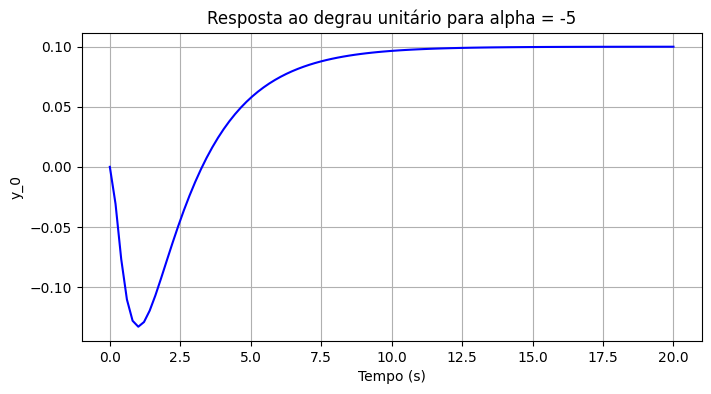

transformada inversa de alpha = -2: 0.1*Heaviside(t) - 0.0814814814814815*exp(-5.0*t)*Heaviside(t) + 0.277777777777778*exp(-2.0*t)*Heaviside(t) - 0.296296296296296*exp(-0.5*t)*Heaviside(t)


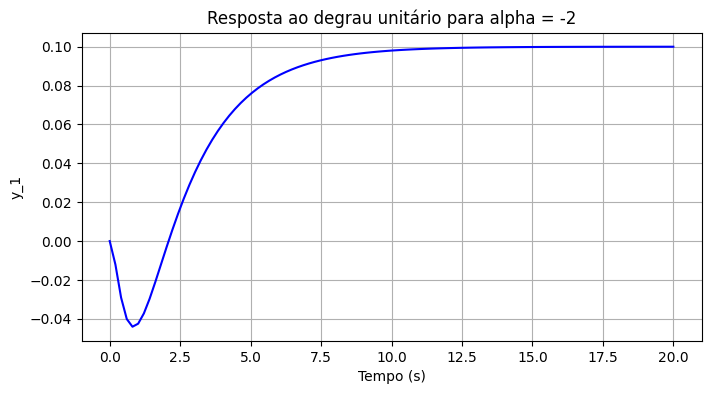

transformada inversa de alpha = 1: 0.1*Heaviside(t) + 0.0296296296296296*exp(-5.0*t)*Heaviside(t) - 0.0555555555555556*exp(-2.0*t)*Heaviside(t) - 0.0740740740740741*exp(-0.5*t)*Heaviside(t)


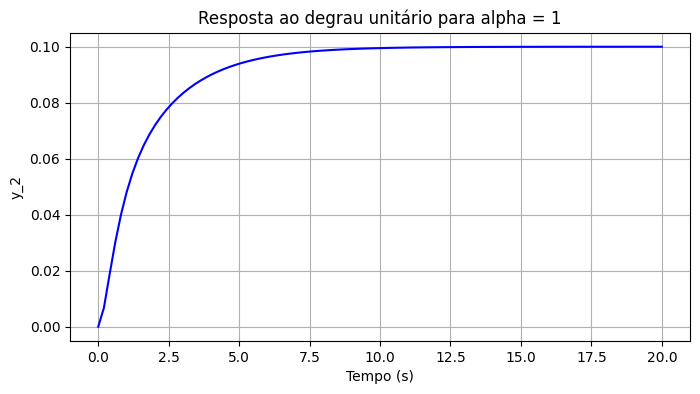

transformada inversa de alpha = 2: 0.1*Heaviside(t) + 0.0666666666666667*exp(-5.0*t)*Heaviside(t) - 0.166666666666667*exp(-2.0*t)*Heaviside(t)


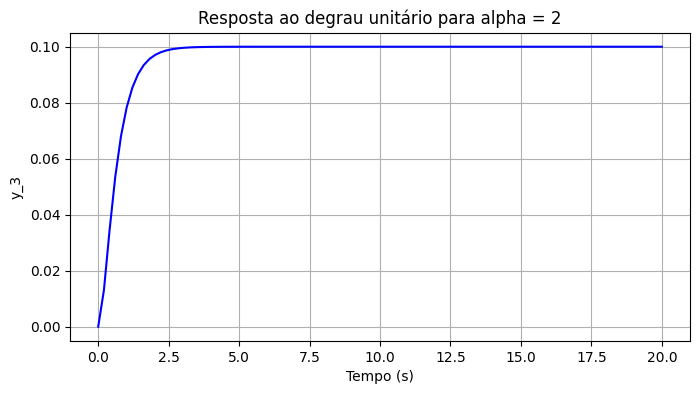

transformada inversa de alpha = 5: 0.1*Heaviside(t) + 0.177777777777778*exp(-5.0*t)*Heaviside(t) - 0.5*exp(-2.0*t)*Heaviside(t) + 0.222222222222222*exp(-0.5*t)*Heaviside(t)


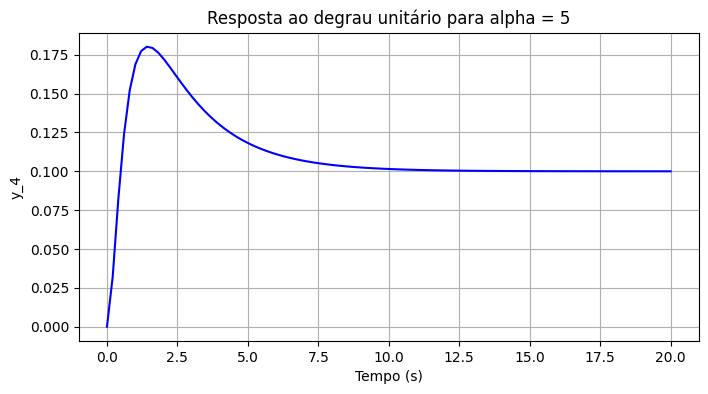

In [19]:
#gráficos individuais de cada alpha 

alfa = [-5, -2, 1, 2, 5]


for i in range(len(alfa)):
    a = alfa[i]
    transformada_inversa_laplace_a = sym.inverse_laplace_transform(G_s(a), s, t)
    print(f'transformada inversa de alpha = {a}: {transformada_inversa_laplace_a}')
    y = sym.lambdify(t, transformada_inversa_laplace_a, modules=['numpy'])
    y_i = y(x)

    plt.figure(figsize=(8,4))
    plt.plot(x, y_i, color='b')
    plt.title(f'Resposta ao degrau unitário para alpha = {a}')
    plt.xlabel('Tempo (s)')
    plt.ylabel(f'y_{i}')
    plt.grid(True)
    plt.show()



transformada inversa de alpha = -5: 0.1*Heaviside(t) - 0.192592592592593*exp(-5.0*t)*Heaviside(t) + 0.611111111111111*exp(-2.0*t)*Heaviside(t) - 0.518518518518518*exp(-0.5*t)*Heaviside(t)
transformada inversa de alpha = -2: 0.1*Heaviside(t) - 0.0814814814814815*exp(-5.0*t)*Heaviside(t) + 0.277777777777778*exp(-2.0*t)*Heaviside(t) - 0.296296296296296*exp(-0.5*t)*Heaviside(t)
transformada inversa de alpha = 1: 0.1*Heaviside(t) + 0.0296296296296296*exp(-5.0*t)*Heaviside(t) - 0.0555555555555556*exp(-2.0*t)*Heaviside(t) - 0.0740740740740741*exp(-0.5*t)*Heaviside(t)
transformada inversa de alpha = 2: 0.1*Heaviside(t) + 0.0666666666666667*exp(-5.0*t)*Heaviside(t) - 0.166666666666667*exp(-2.0*t)*Heaviside(t)
transformada inversa de alpha = 5: 0.1*Heaviside(t) + 0.177777777777778*exp(-5.0*t)*Heaviside(t) - 0.5*exp(-2.0*t)*Heaviside(t) + 0.222222222222222*exp(-0.5*t)*Heaviside(t)


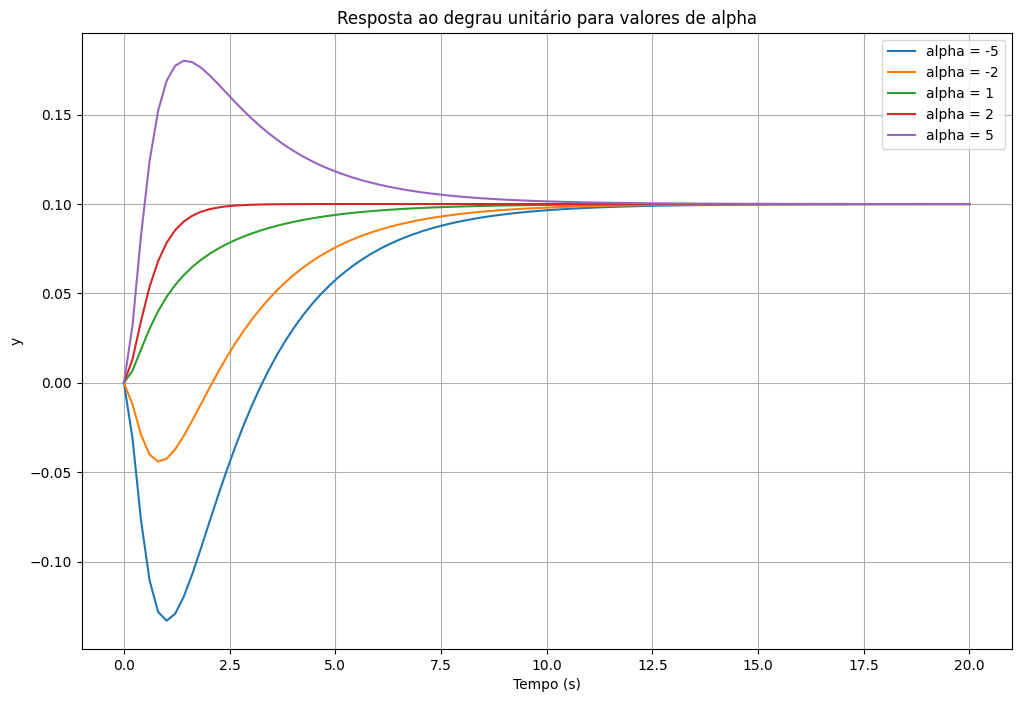

In [15]:
#Gráfico comparativo dos valores de alpha da resposta ao degrau unitário

plt.figure(figsize=(12,8))

for i in range(len(alfa)):
    a = alfa[i]
    transformada_inversa_laplace_a = sym.inverse_laplace_transform(G_s(a), s, t) #Aplicando a transformada inversa de laplace
    print(f'transformada inversa de alpha = {a}: {transformada_inversa_laplace_a}')
    y = sym.lambdify(t, transformada_inversa_laplace_a, modules=['numpy'])
    y_i = y(x)
    plt.plot(x, y_i, label=f'alpha = {a}')
    
plt.title(f'Resposta ao degrau unitário para valores de alpha')
plt.xlabel('Tempo (s)')
plt.ylabel(f'y')
plt.grid(True)
plt.legend() 
